# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [0]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [0]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
7035,0.282593,-0.01823,-0.10861,-0.991026,-0.962706,-0.993585,-0.99181,-0.971048,-0.992155,-0.930868,...,0.205477,-0.369321,0.303722,0.452188,0.513488,-0.390353,-0.616667,30,6,LAYING


In [0]:
train.shape

(7352, 564)

## Obtain the  test data 

In [0]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1683,0.131517,-0.115616,-0.208167,-0.246124,-0.274395,-0.059285,-0.326047,-0.31082,-0.02357,0.041278,...,0.059287,0.594489,0.985875,-0.490529,-0.601561,0.261179,0.244828,13,2,WALKING_UPSTAIRS


In [0]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [0]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [0]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

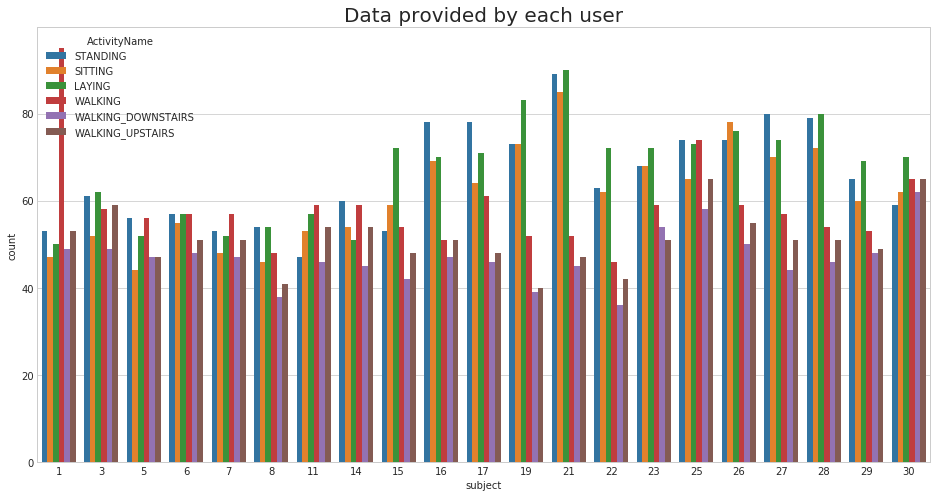

In [0]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

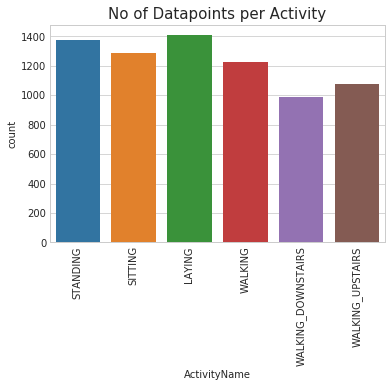

In [0]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [0]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [0]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


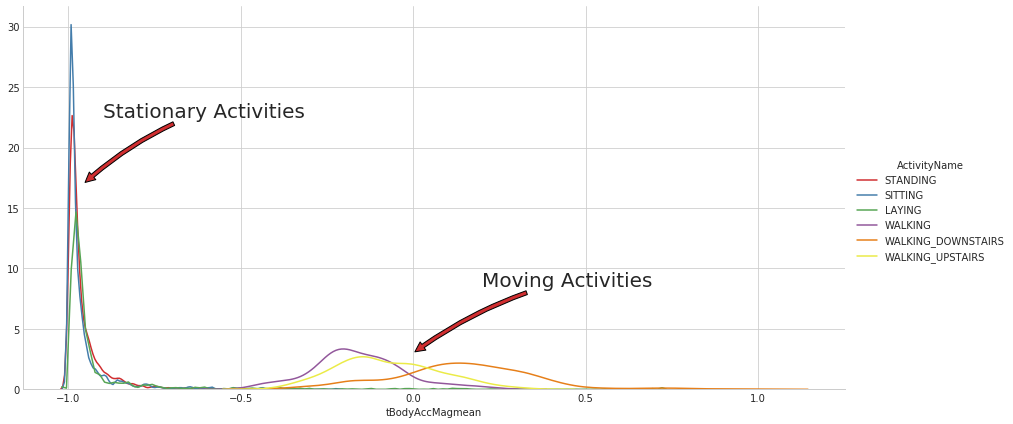

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


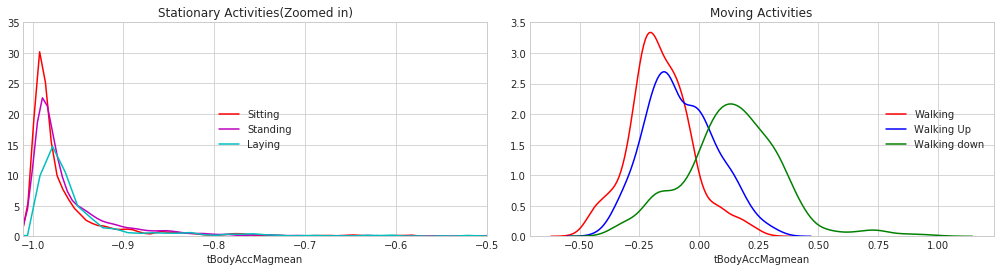

In [0]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

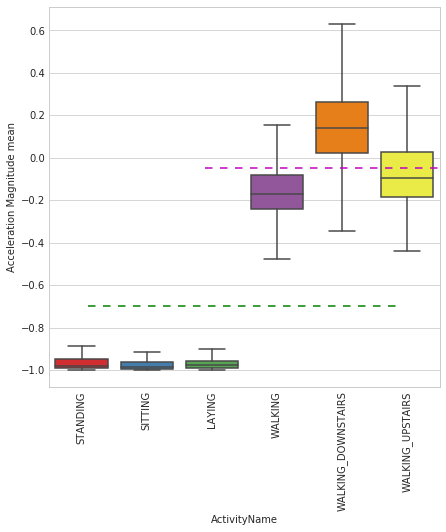

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

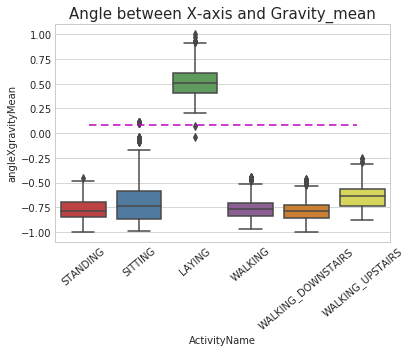

In [0]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

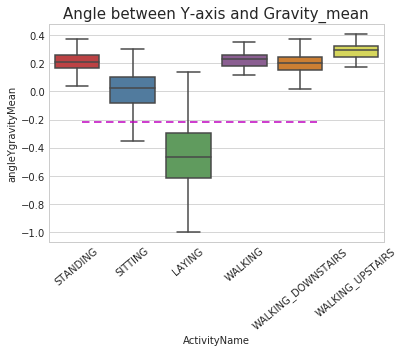

In [0]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [0]:
# Apart from the above exploratory data analysis much more EDA can be done, for that we will list the variables 
# to consider on which variable we should perform EDA.

# We will perform more EDA by choosing certain variables.

list(train.columns.values)

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

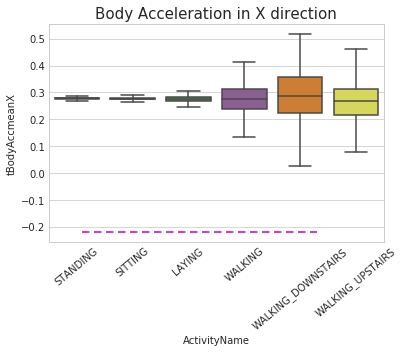

In [0]:
# 6. We will explore the variable 'tBodyAccmeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccmeanX', data = train, showfliers=False)
plt.title('Body Acceleration in X direction', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.27, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of acceleration for different activities in X-direction.

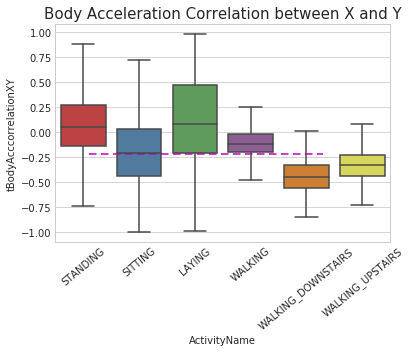

In [0]:
# 7. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAcccorrelationXY', data = train, showfliers=False)
plt.title('Body Acceleration Correlation between X and Y', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the accn-correaltion betwn XY > -0.25 the will mostly be standing laying or walking.
# If the accn-correaltion betwn XY < -0.25 the will mostly be walking downstairs or upstairs.
# If the accn-correaltion median is approximately equal to 0.25 then the activity will sitting.

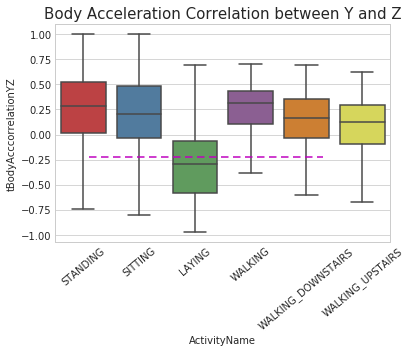

In [0]:
# 8. We will explore the variable 'tBodyAcccorrelationYZ' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAcccorrelationYZ', data = train, showfliers=False)
plt.title('Body Acceleration Correlation between Y and Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the accn-correaltion between YZ < -0.25 the will mostly laying, else we will have rest of the activities.


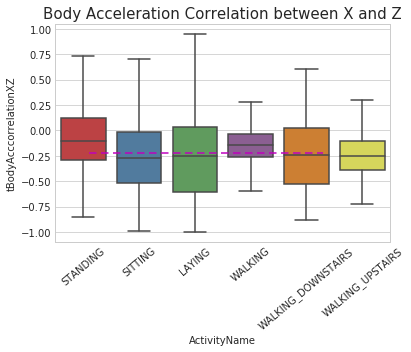

In [0]:
# 9. We will explore the variable 'tBodyAcccorrelationXZ' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAcccorrelationXZ', data = train, showfliers=False)
plt.title('Body Acceleration Correlation between X and Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# From the plot of acceleration corrn between X and Z we can say that there is not much information to distinguish between the 
# various activities for this variable.


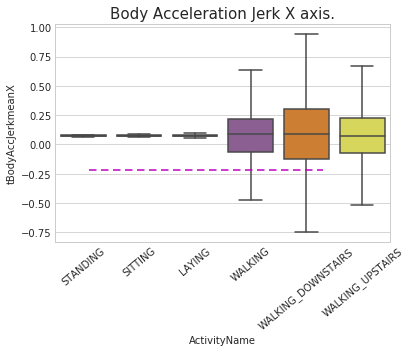

In [0]:
# 10. We will explore the variable 'tBodyAccJerkmeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkmeanX', data = train, showfliers=False)
plt.title('Body Acceleration Jerk X axis.', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.05, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of acceleration jerk for different activities in X-direction.

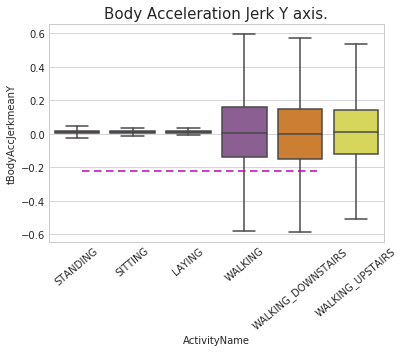

In [0]:
# 11. We will explore the variable 'tBodyAccJerkmeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkmeanY', data = train, showfliers=False)
plt.title('Body Acceleration Jerk Y axis.', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of acceleration jerk for different activities in Y-direction.

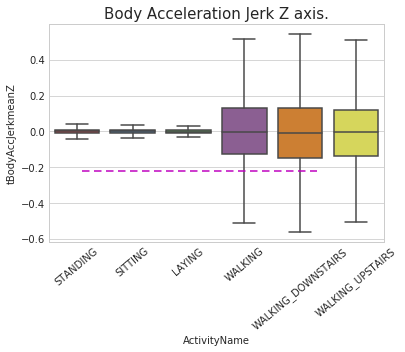

In [0]:
# 12. We will explore the variable 'tBodyAccJerkmeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkmeanZ', data = train, showfliers=False)
plt.title('Body Acceleration Jerk Z axis.', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of acceleration jerk for different activities in z-direction.

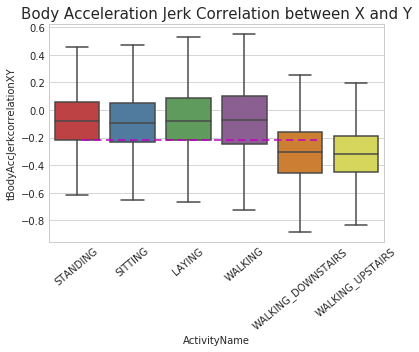

In [0]:
# 13. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkcorrelationXY', data = train, showfliers=False)
plt.title('Body Acceleration Jerk Correlation between X and Y', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.05, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the accn jerk-correaltion betwn XY > -0.2 the activity will mostly be standing, sitting, laying or walking.


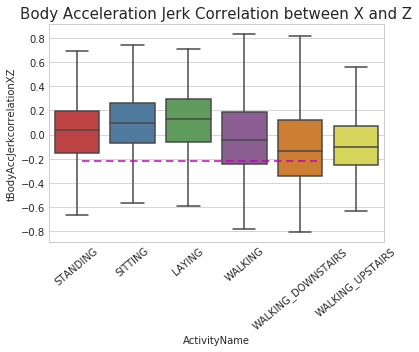

In [0]:
# 14. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkcorrelationXZ', data = train, showfliers=False)
plt.title('Body Acceleration Jerk Correlation between X and Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the median accn jerk-correaltion betwn XZ > 0 theactivity  will mostly be standing, sitting or laying.
# If the median accn jerk-correaltion betwn XZ < 0 theactivity  will mostly be walking, walking up or walking down.


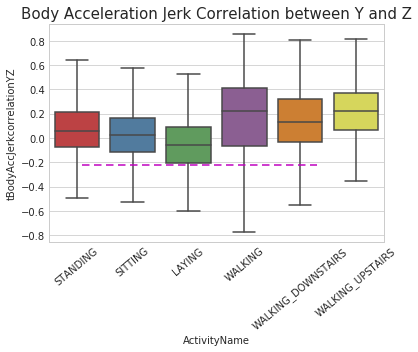

In [0]:
# 15. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkcorrelationYZ', data = train, showfliers=False)
plt.title('Body Acceleration Jerk Correlation between Y and Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.1, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the median accn jerk-correaltion betwn XZ > 0 theactivity  will mostly be walking, walking up or walking down.

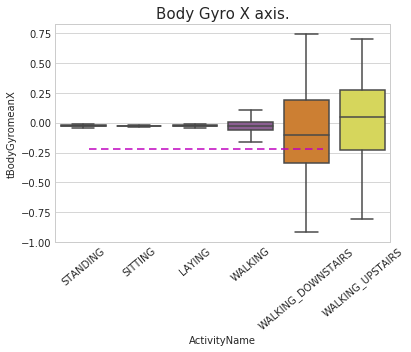

In [0]:
# 16. We will explore the variable 'tBodyGyromeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyromeanX', data = train, showfliers=False)
plt.title('Body Gyro X axis.', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of gyro data for different activities in X-direction.

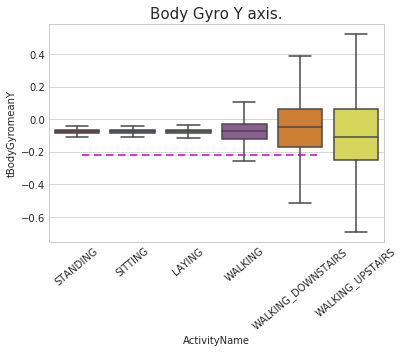

In [0]:
# 17. We will explore the variable 'tBodyGyromeanY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyromeanY', data = train, showfliers=False)
plt.title('Body Gyro Y axis.', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.08, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of gyro data for different activities in Y-direction.

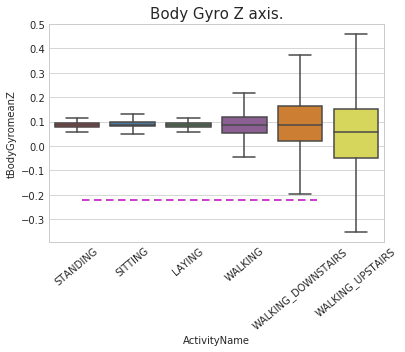

In [0]:
# 18. We will explore the variable 'tBodyGyromeanZ' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyromeanZ', data = train, showfliers=False)
plt.title('Body Gyro Z axis.', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.1, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# By plotting the above variable we cannot really distinguish or have a threshold for which we can distinguish the 
# various activities.

# We can see that there is difference in magnitude of acceleration jerk for different activities in Z-direction.

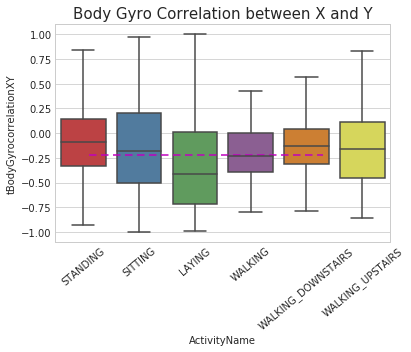

In [0]:
# 19. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyrocorrelationXY', data = train, showfliers=False)
plt.title('Body Gyro Correlation between X and Y', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the accn jerk-correaltion betwn XY > -0.2 the activity will mostly be standing, sitting, laying or walking.


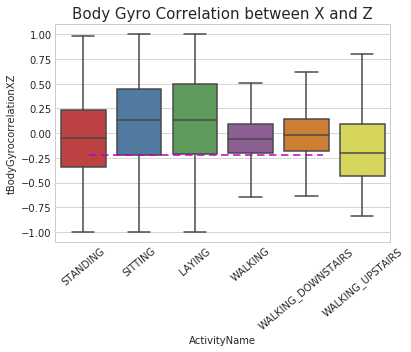

In [0]:
# 20. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyrocorrelationXZ', data = train, showfliers=False)
plt.title('Body Gyro Correlation between X and Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# There is not a great deal of information in this variable.


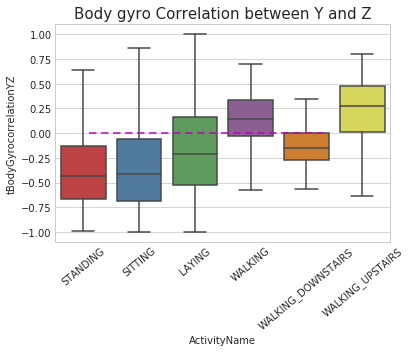

In [0]:
# 21. We will explore the variable 'tBodyAcccorrelationXY' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyrocorrelationYZ', data = train, showfliers=False)
plt.title('Body gyro Correlation between Y and Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the Body Gyrocorrelation between Y and Z > 0 the activity will mostly be walking or walking upstairs.

# Else the activity will be satnding, sitting, laying or walking downstairs.


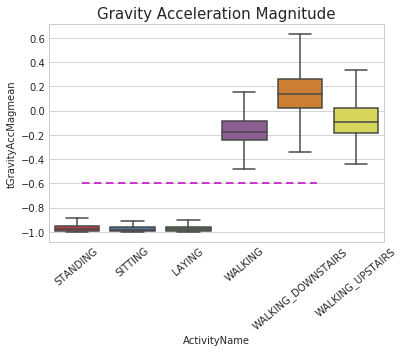

In [0]:
# 22. We will explore the variable 'tGravityAccMagmean' by making a boxplot

sns.boxplot(x='ActivityName', y='tGravityAccMagmean', data = train, showfliers=False)
plt.title('Gravity Acceleration Magnitude', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.6, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the gravity accn magnitude > -0.6 the activity will mostly be walking, walking downstairs and walking upstairs.


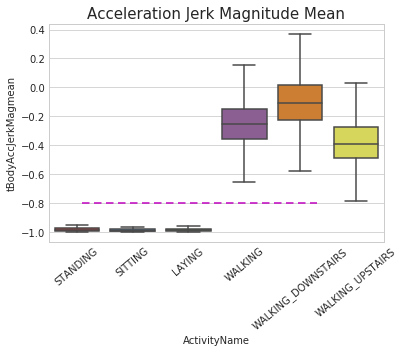

In [0]:
# 23. We will explore the variable 'tBodyAccJerkMagmean' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyAccJerkMagmean', data = train, showfliers=False)
plt.title('Acceleration Jerk Magnitude Mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the BodyAccJerkMagmean > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs.

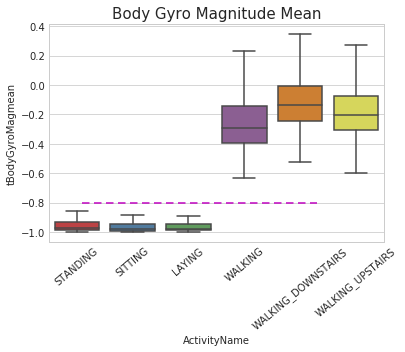

In [0]:

# 23. We will explore the variable 'tBodyGyroMagmean' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyroMagmean', data = train, showfliers=False)
plt.title('Body Gyro Magnitude Mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the BodyGyroMagmean > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs.

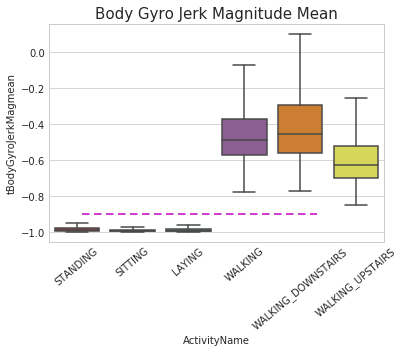

In [0]:

# 24. We will explore the variable 'tBodyGyroJerkMagmean' by making a boxplot

sns.boxplot(x='ActivityName', y='tBodyGyroJerkMagmean', data = train, showfliers=False)
plt.title('Body Gyro Jerk Magnitude Mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.9, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the BodyGyroJerkMagmean > -0.9 the activity will mostly be walking, walking downstairs and walking upstairs.

## We will now perform analysis on Fourier Transformed features.

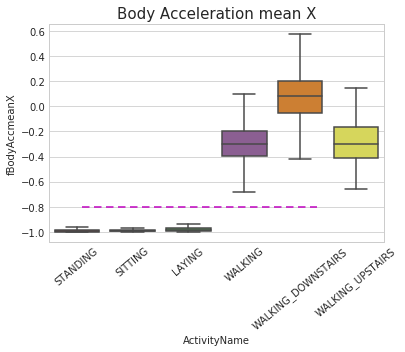

In [0]:
# 25. We will explore the variable 'fBodyAccmeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyAccmeanX', data = train, showfliers=False)
plt.title('Body Acceleration mean X', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyAccmeanX > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

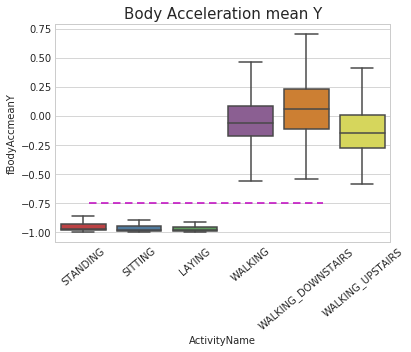

In [0]:
# 26. We will explore the variable 'fBodyAccmeanY' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyAccmeanY', data = train, showfliers=False)
plt.title('Body Acceleration mean Y', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.75, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyAccmeanY > -0.75 the activity will mostly be walking, walking downstairs and walking upstairs

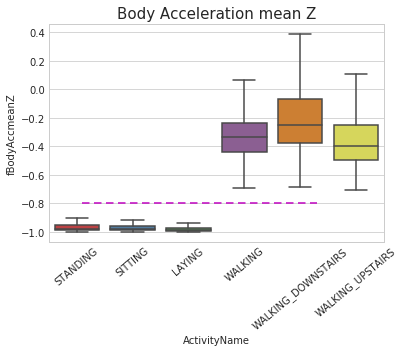

In [0]:
# 27. We will explore the variable 'fBodyAccmeanZ' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyAccmeanZ', data = train, showfliers=False)
plt.title('Body Acceleration mean Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyAccmeanZ > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

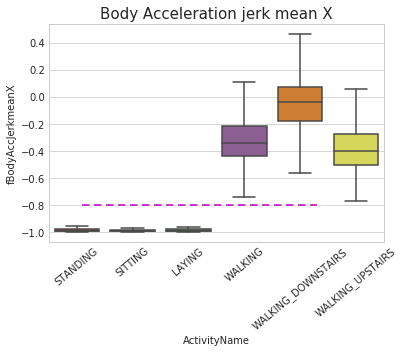

In [0]:
# 28. We will explore the variable 'fBodyAccJerkmeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyAccJerkmeanX', data = train, showfliers=False)
plt.title('Body Acceleration jerk mean X', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyAccJerkmeanX > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

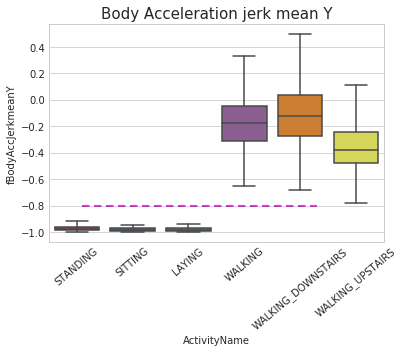

In [0]:
# 29. We will explore the variable 'fBodyAccJerkmeanY' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyAccJerkmeanY', data = train, showfliers=False)
plt.title('Body Acceleration jerk mean Y', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyAccJerkmeanY > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

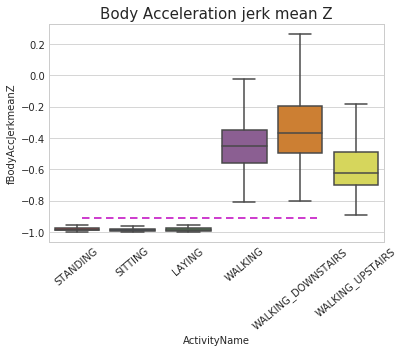

In [0]:
# 30. We will explore the variable 'fBodyAccJerkmeanZ' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyAccJerkmeanZ', data = train, showfliers=False)
plt.title('Body Acceleration jerk mean Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.91, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyAccJerkmeanZ > -0.91 the activity will mostly be walking, walking downstairs and walking upstairs

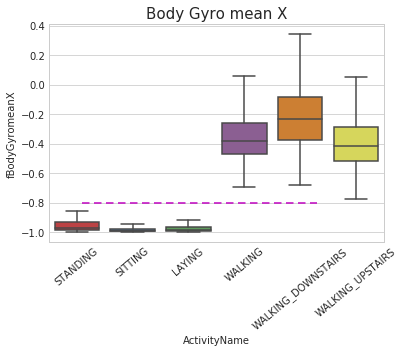

In [0]:
# 31. We will explore the variable 'fBodyGyromeanX' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyGyromeanX', data = train, showfliers=False)
plt.title('Body Gyro mean X', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyGyromeanX > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

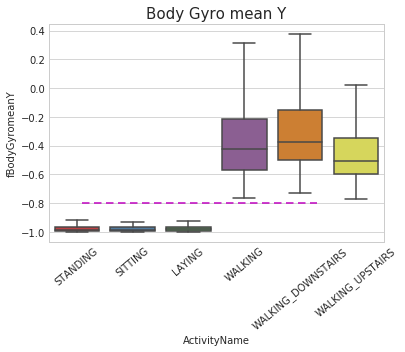

In [0]:
# 32. We will explore the variable 'fBodyGyromeanY' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyGyromeanY', data = train, showfliers=False)
plt.title('Body Gyro mean Y', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyGyromeanY > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

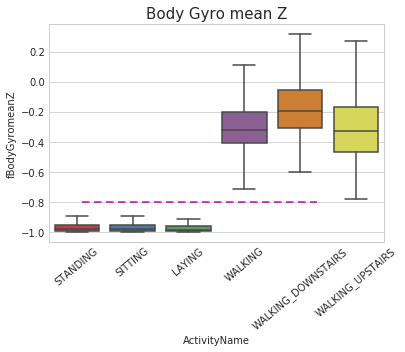

In [0]:
# 33. We will explore the variable 'fBodyGyromeanZ' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyGyromeanZ', data = train, showfliers=False)
plt.title('Body Gyro mean Z', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyGyromeanZ > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

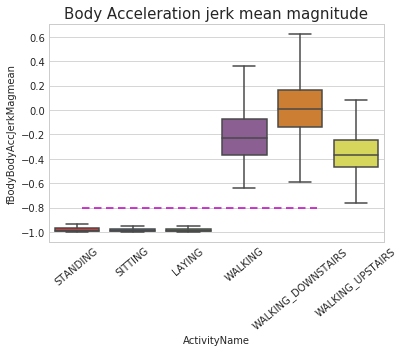

In [0]:
# 34. We will explore the variable 'fBodyBodyAccJerkMagmean' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyBodyAccJerkMagmean', data = train, showfliers=False)
plt.title('Body Acceleration jerk mean magnitude', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyBodyAccJerkMagmean > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

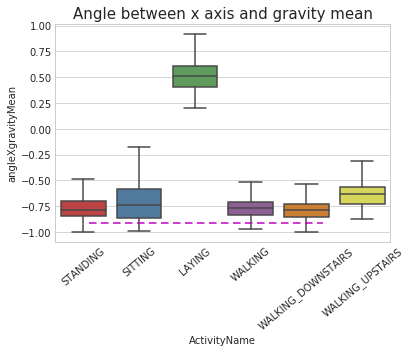

In [0]:
# 35. We will explore the variable 'angleXgravityMean' by making a boxplot

sns.boxplot(x='ActivityName', y='angleXgravityMean', data = train, showfliers=False)
plt.title('Angle between x axis and gravity mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the angleXgravityMean > 0 the activity will mostly be laying else rest of the activities.

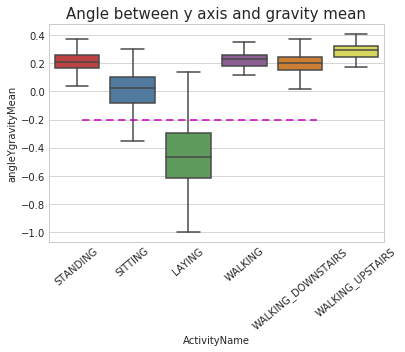

In [0]:
# 36. We will explore the variable 'angleYgravityMean' by making a boxplot

sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between y axis and gravity mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.2, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the angleYgravityMean < -0.2 the activity will mostly be laying.

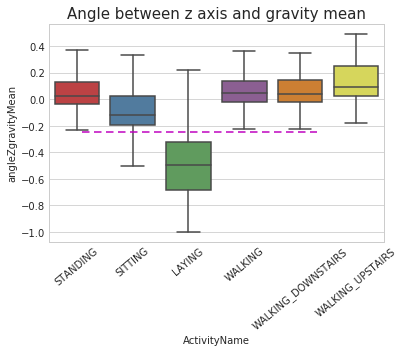

In [0]:
# 37. We will explore the variable 'angleZgravityMean' by making a boxplot

sns.boxplot(x='ActivityName', y='angleZgravityMean', data = train, showfliers=False)
plt.title('Angle between z axis and gravity mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.25, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the angleZgravityMean < -0.25 the activity will mostly be laying else rest

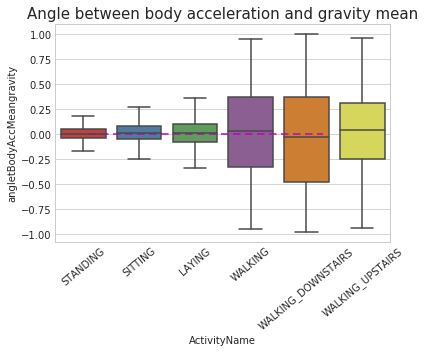

In [0]:
# 38. We will explore the variable 'angletBodyAccMeangravity' by making a boxplot

sns.boxplot(x='ActivityName', y='angletBodyAccMeangravity', data = train, showfliers=False)
plt.title('Angle between body acceleration and gravity mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# This feature shows not much information regarding activity separability

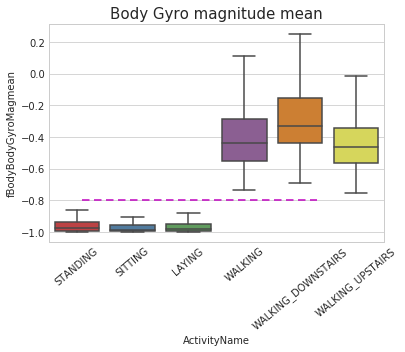

In [0]:
# 39. We will explore the variable 'fBodyBodyGyroMagmean' by making a boxplot

sns.boxplot(x='ActivityName', y='fBodyBodyGyroMagmean', data = train, showfliers=False)
plt.title('Body Gyro magnitude mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.8, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# OBSERVATIONS:

# If the fBodyBodyGyroMagmean > -0.8 the activity will mostly be walking, walking downstairs and walking upstairs

### We have perfomed exploratory data analysis extensively by selecting a few random features.

### Some features are really useful for activity separation.

### Some features are not useful for activity separation at all.

### Some features carry the same information but are useful for activity separation.

# Apply t-sne on the data 

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.426s...
[t-SNE] Computed neighbors for 7352 samples in 72.001s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 124.8017578, gradient norm = 0.0253939 (50 iterations in 16.625s)
[t-SNE] Iteration 100: error = 107.2019501, gradient norm = 0.0284782 (50 iterations i

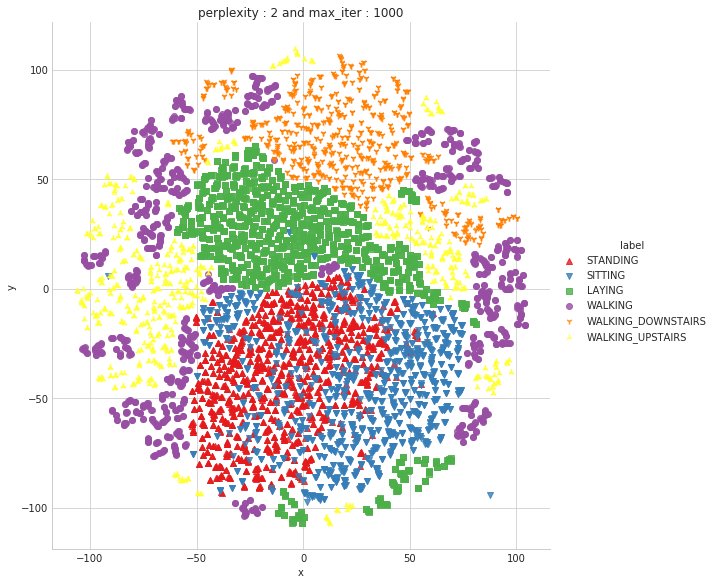

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.263s...
[t-SNE] Computed neighbors for 7352 samples in 48.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 114.1862640, gradient norm = 0.0184120 (50 iterations in 55.655s)
[t-SNE] Iteration 100: error = 97.6535568, gradient norm = 0.0174309 (50 iterati

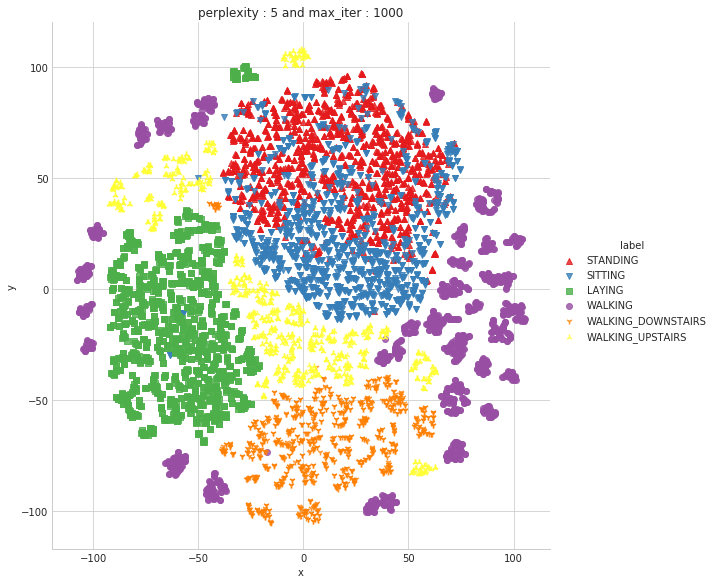

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.410s...
[t-SNE] Computed neighbors for 7352 samples in 64.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.214s
[t-SNE] Iteration 50: error = 106.0169220, gradient norm = 0.0194293 (50 iterations in 24.550s)
[t-SNE] Iteration 100: error = 90.3036194, gradient norm = 0.0097653 (50 iterat

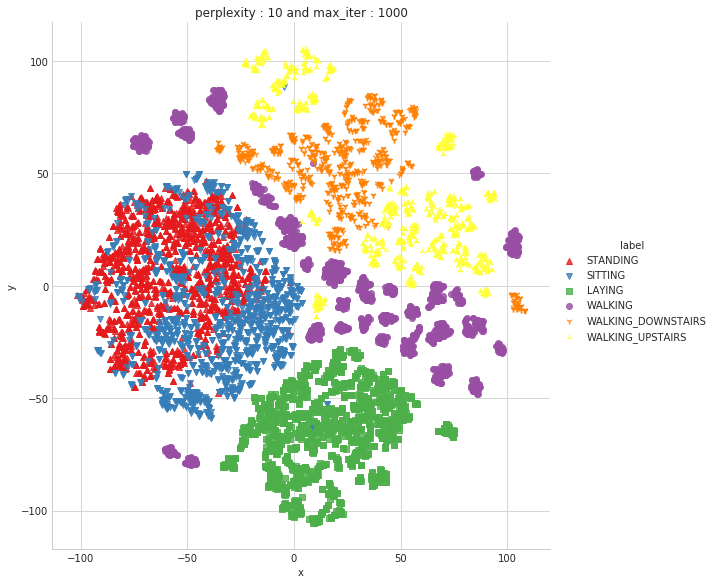

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.425s...
[t-SNE] Computed neighbors for 7352 samples in 61.792s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.355s
[t-SNE] Iteration 50: error = 97.5202179, gradient norm = 0.0223863 (50 iterations in 21.168s)
[t-SNE] Iteration 100: error = 83.9500732, gradient norm = 0.0059110 (50 iterati

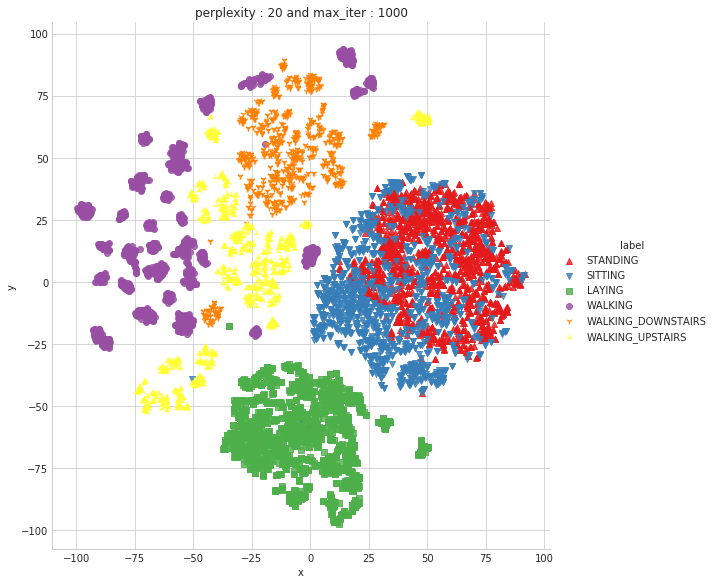

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.376s...
[t-SNE] Computed neighbors for 7352 samples in 73.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.844s
[t-SNE] Iteration 50: error = 86.1525574, gradient norm = 0.0242986 (50 iterations in 36.249s)
[t-SNE] Iteration 100: error = 75.9874649, gradient norm = 0.0061005 (50 iterat

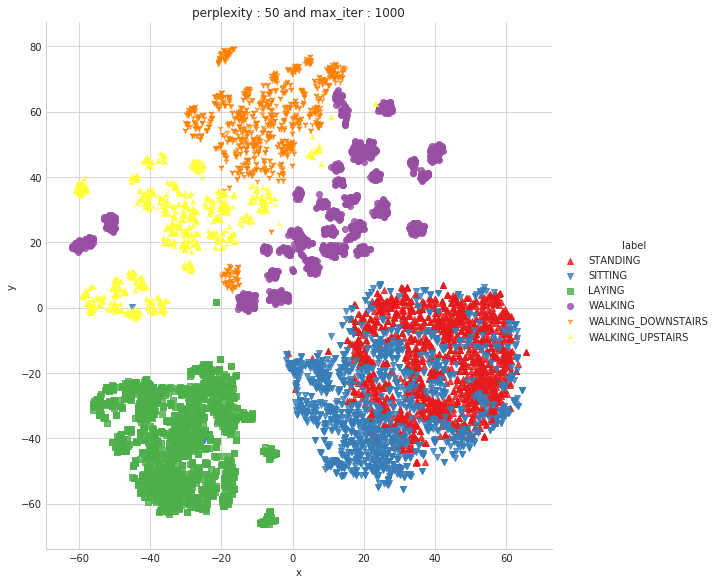

Done


In [0]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

## Building prediction models

## Obtain the train and test datasets:

In [1]:
from zipfile import ZipFile
file_name = "UCI_HAR_Dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/content/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)


((7352, 564), (2947, 564))


In [5]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [8]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.6min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:04:50.170053


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008456


---------------------
|      Accuracy      |
---------------------

    0.963013233797


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


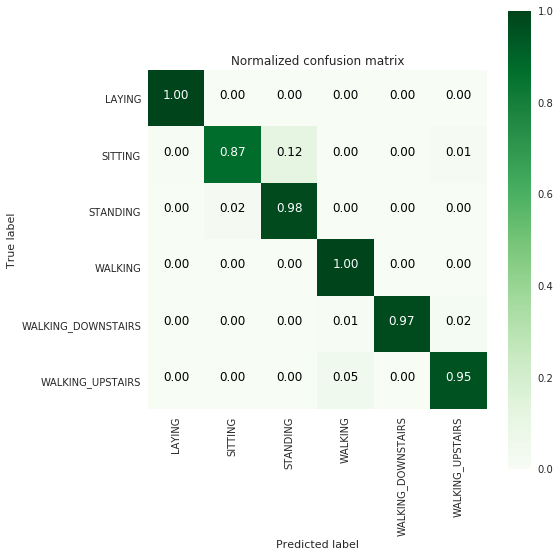

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [14]:

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


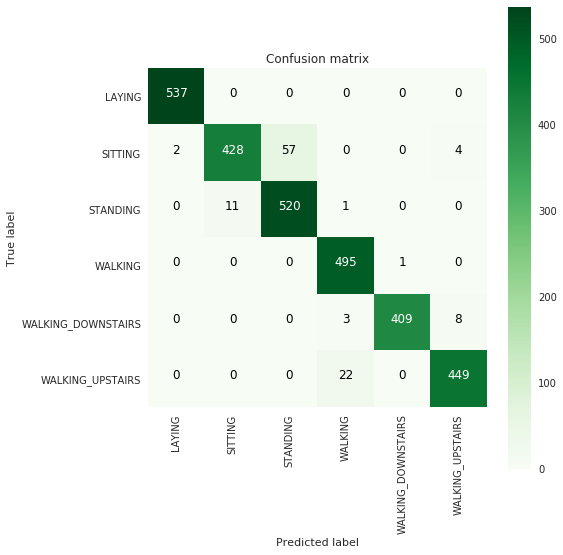

In [15]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [16]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 30}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.945865070729



#  2. Linear SVC with GridSearch

In [0]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.6min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:44.221475


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013961


---------------------
|      Accuracy      |
---------------------

    0.964370546318


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 420  65   0   0   4]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


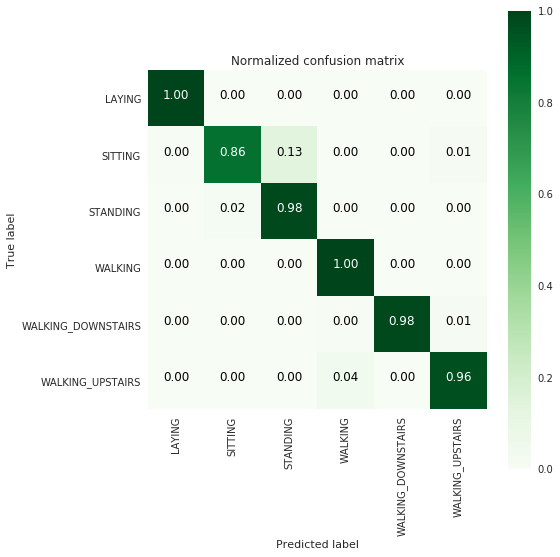

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.91       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



In [18]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [19]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.94668117519



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:07:45.805566


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.057566


---------------------
|      Accuracy      |
---------------------

    0.962673905667


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


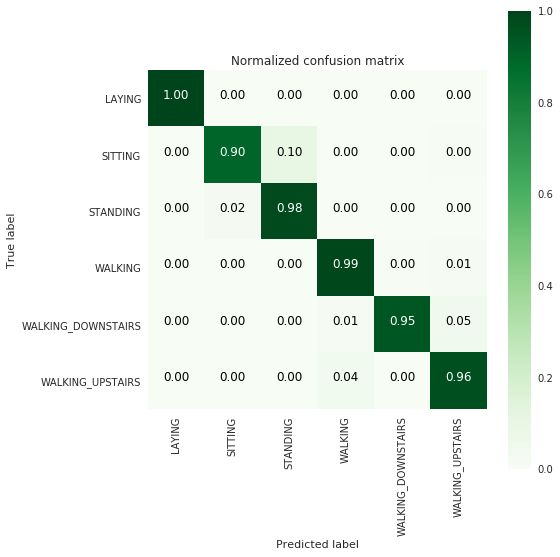

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [20]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [21]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.944096844396



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:13.776517


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006029


---------------------
|      Accuracy      |
---------------------

    0.8656260604


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 387 104   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  16 342  62]
 [  0   0   0  73  24 374]]


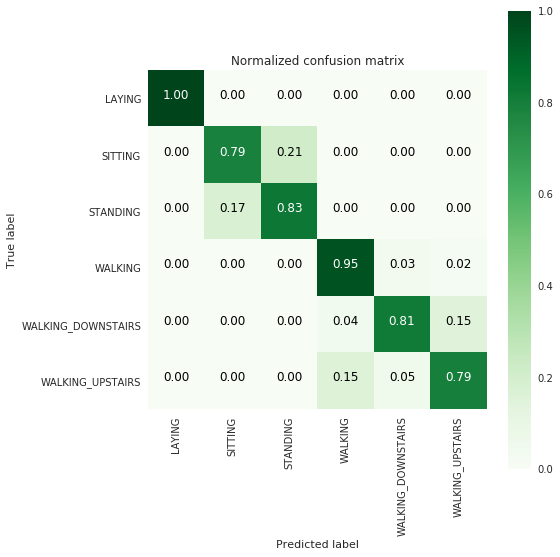

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.81      0.85       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

         micro avg       0.87      0.87      0.87      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.87      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_spl

In [22]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:09:41.570971


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.035131


---------------------
|      Accuracy      |
---------------------

    0.907363420428


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 428  63   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 482  11   3]
 [  0   0   0  39 333  48]
 [  0   0   0  44   6 421]]


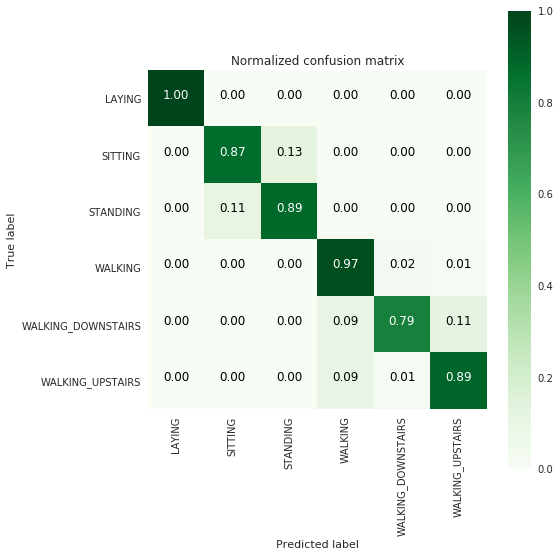

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.87      0.88       491
          STANDING       0.88      0.89      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.79      0.86       420
  WALKING_UPSTAIRS       0.89      0.89      0.89       471

         micro avg       0.91      0.91      0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=

In [23]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 1:19:13.340939


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.065458


---------------------
|      Accuracy      |
---------------------

    0.923311842552


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 399  90   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


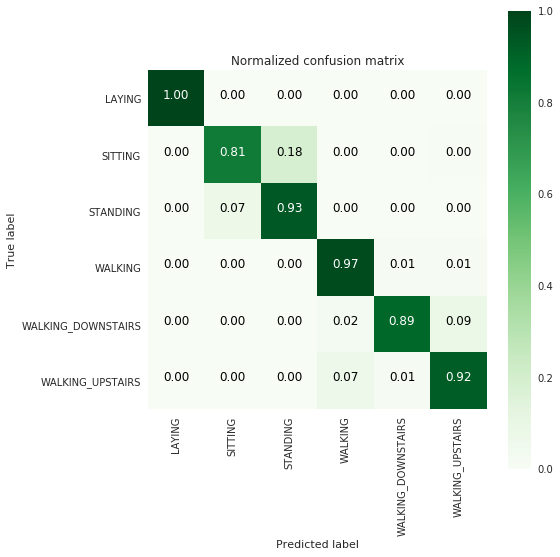

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

         micro avg       0.92      0.92      0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_s

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [25]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.44%       3.563% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.56%      13.44% 
Random Forest       : 90.74%      9.264% 
GradientBoosting DT : 90.74%      9.264% 


# Building Deep Learning Models:

In [1]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [2]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [3]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [4]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [5]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [6]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [7]:
# Importing tensorflow
import numpy as np
import pandas as pd

np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\kulkarni\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [9]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [10]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [11]:
# Initializing parameters
epochs = 30
batch_size = 64
#n_hidden = 32

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [12]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [13]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [14]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

In [17]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
# Training the model
import datetime
start = datetime.datetime.now()

model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 50s 7ms/step - loss: 1.3306 - acc: 0.4361 - val_loss: 1.1743 - val_acc: 0.4723
Epoch 2/30
7352/7352 [==============================] - 48s 7ms/step - loss: 0.9716 - acc: 0.5788 - val_loss: 0.9656 - val_acc: 0.5263
Epoch 3/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.7787 - acc: 0.6510 - val_loss: 0.7841 - val_acc: 0.6135
Epoch 4/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.6911 - acc: 0.6587 - val_loss: 0.7109 - val_acc: 0.6203
Epoch 5/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.6496 - acc: 0.6794 - val_loss: 0.8000 - val_acc: 0.6362
Epoch 6/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.8295 - acc: 0.6221 - val_loss: 0.7970 - val_acc: 0.6318
Epoch 7/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.5920 - acc: 0.7

In [22]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      398        66        0                   0   
STANDING                 0      100       418        2                   0   
WALKING                  0        3         0      465                   8   
WALKING_DOWNSTAIRS       0        0         0        0                 360   
WALKING_UPSTAIRS         0        3         0       23                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                           27  
STANDING                          12  
WALKING                           20  
WALKING_DOWNSTAIRS                60  
WALKING_UPSTAIRS                 444  


In [23]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 2s 700us/step


In [24]:
score

[0.4692274864947224, 0.8805564981336953]

- With a simple 2 layer architecture we got 88.05% accuracy and a loss of 0.46
- We can further imporve the performace with Hyperparameter tuning

# Now that we have built our simple LSTM architecture we will try using various hyperparameters and check if we have any improvement in model performance.

In [15]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


## Creating 3 Layer Architecture with 32 neurons in LSTM layers and dropout

In [16]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding another LSTM layer
model.add(LSTM(32))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________

In [17]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
# Training the model
import datetime
start = datetime.datetime.now()

training_model = model.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1518 - acc: 0.9483 - val_loss: 0.5369 - val_acc: 0.8972
Epoch 2/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1652 - acc: 0.9445 - val_loss: 0.3796 - val_acc: 0.9026
Epoch 3/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1462 - acc: 0.9510 - val_loss: 0.4430 - val_acc: 0.8992
Epoch 4/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1534 - acc: 0.9449 - val_loss: 0.5069 - val_acc: 0.9023
Epoch 5/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1609 - acc: 0.9449 - val_loss: 0.3544 - val_acc: 0.9060
Epoch 6/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.1539 - acc: 0.9468 - val_loss: 0.3095 - val_acc: 0.9206
Epoch 7/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.1449 - acc: 0.9493 - val_loss: 0.4286 - val_acc: 0.9094
Epoch 8

Test Accuracy: 89.039701%

--------------------------------------------



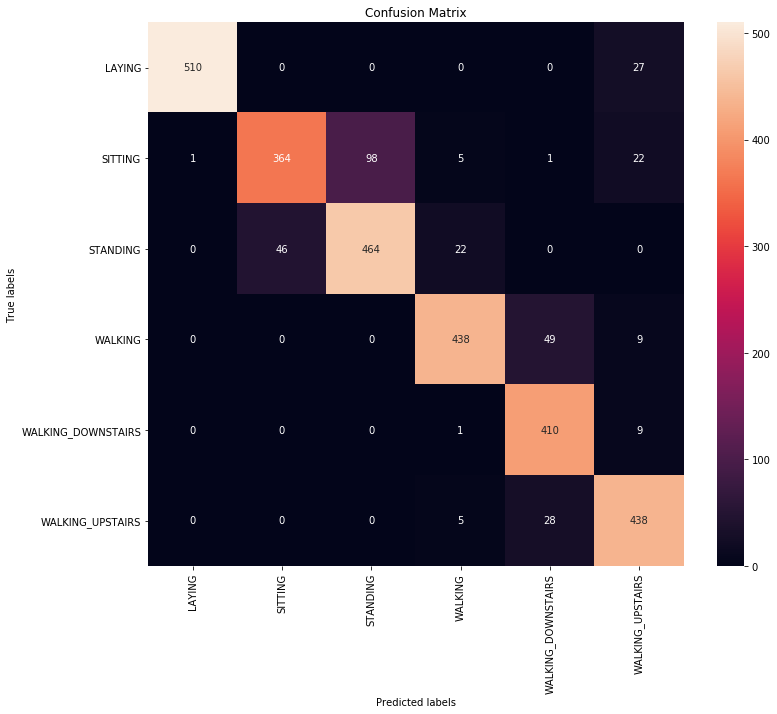

In [19]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);


In [24]:
# Checking the parameters that can be extracted from the model

print(training_model.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


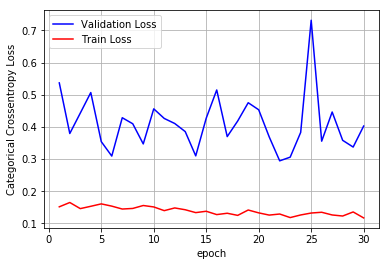

In [26]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

val_loss = training_model.history['val_loss']
train_loss = training_model.history['loss']   
    
ax.plot(list(range(1,epochs+1)), val_loss, 'b', label="Validation Loss")
ax.plot(list(range(1,epochs+1)), train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()
# We can see that the model learns the training data very well but, the performance on the validation data is worst.
# The best epoch is 22.

## Creating 3 Layer Architecture with 32 neurons in LSTM layers and dropout and batchnormalization

In [27]:
# Initiliazing the sequential model
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences= True,bias_regularizer= reg))
# Adding a batchnormalization layer
model1.add(BatchNormalization())
# Adding a dropout layer
model1.add(Dropout(0.5))
# Adding another LSTM layer
model1.add(LSTM(32))
# Adding a dropout layer
model1.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_________________________________________________________________


In [28]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model1 = model1.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)


print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 32s 4ms/step - loss: 1.8881 - acc: 0.5612 - val_loss: 1.5978 - val_acc: 0.5931
Epoch 2/30
7352/7352 [==============================] - 30s 4ms/step - loss: 1.3936 - acc: 0.6695 - val_loss: 1.2478 - val_acc: 0.6614
Epoch 3/30
7352/7352 [==============================] - 30s 4ms/step - loss: 1.1585 - acc: 0.6933 - val_loss: 1.1023 - val_acc: 0.7370
Epoch 4/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.9762 - acc: 0.7651 - val_loss: 0.9210 - val_acc: 0.7842
Epoch 5/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.8096 - acc: 0.8266 - val_loss: 0.9431 - val_acc: 0.7842
Epoch 6/30
7352/7352 [==============================] - 30s 4ms/step - loss: 0.6485 - acc: 0.8787 - val_loss: 0.6306 - val_acc: 0.8514
Epoch 7/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.5278 - acc: 0.8985 - val_loss: 1.1153 - val_acc: 0.7604
Epoch 8

Test Accuracy: 92.670512%

--------------------------------------------



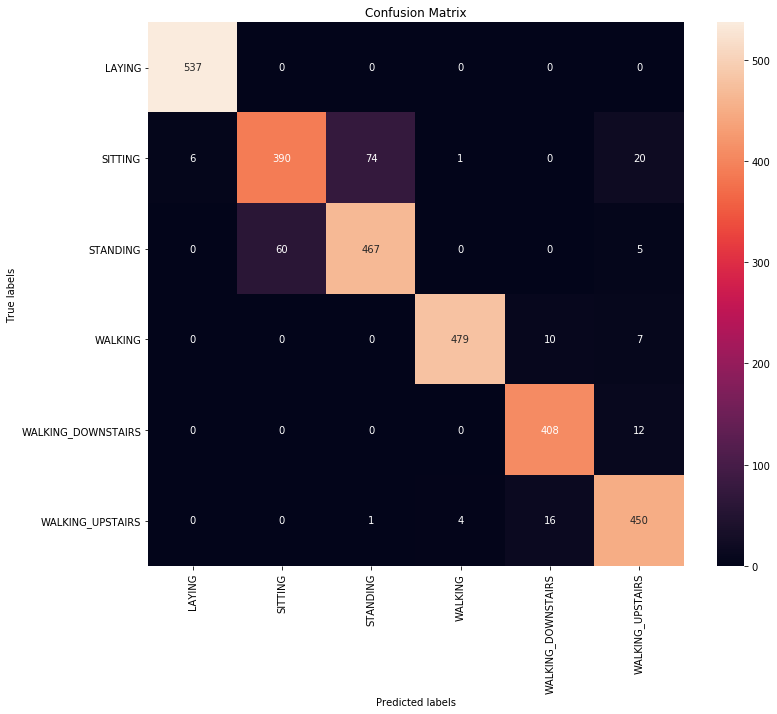

In [83]:
scores1 = model1.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores1[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model1.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);


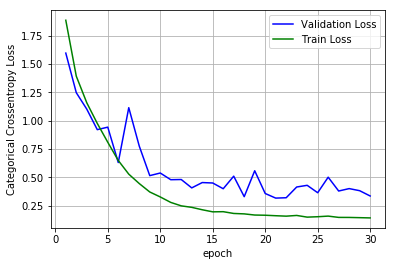

In [32]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.


fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model1.history['val_loss']
train_loss = training_model1.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()
# We can see that the model learns the training data very well but, the performance on the validation data is close to train set.
# The model performs best at epoch 18.

## Creating 3 Layer Architecture with 32 neurons in LSTM layers and dropout(0.7) and batchnormalization

In [33]:
# Initiliazing the sequential model
model2 = Sequential()
# Configuring the parameters
model2.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences= True,bias_regularizer= reg))
# Adding a batchnormalization layer
model2.add(BatchNormalization())
# Adding a dropout layer
model2.add(Dropout(0.7))
# Adding another LSTM layer
model2.add(LSTM(32))
# Adding a dropout layer
model2.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model2.add(Dense(n_classes, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_________________________________________________________________


In [34]:
# Compiling the model
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model2 = model2.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)


print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 33s 5ms/step - loss: 1.9886 - acc: 0.4909 - val_loss: 1.6292 - val_acc: 0.5738
Epoch 2/30
7352/7352 [==============================] - 31s 4ms/step - loss: 1.5302 - acc: 0.5983 - val_loss: 1.3111 - val_acc: 0.6457
Epoch 3/30
7352/7352 [==============================] - 31s 4ms/step - loss: 1.3025 - acc: 0.6279 - val_loss: 1.1389 - val_acc: 0.6403
Epoch 4/30
7352/7352 [==============================] - 32s 4ms/step - loss: 1.1487 - acc: 0.6417 - val_loss: 1.0391 - val_acc: 0.6278
Epoch 5/30
7352/7352 [==============================] - 31s 4ms/step - loss: 1.0459 - acc: 0.6564 - val_loss: 1.2559 - val_acc: 0.5663
Epoch 6/30
7352/7352 [==============================] - 33s 4ms/step - loss: 0.9439 - acc: 0.6681 - val_loss: 0.8771 - val_acc: 0.6356
Epoch 7/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.8484 - acc: 0.6887 - val_loss: 0.7934 - val_acc: 0.6447
Epoch 8

Test Accuracy: 89.039701%

--------------------------------------------



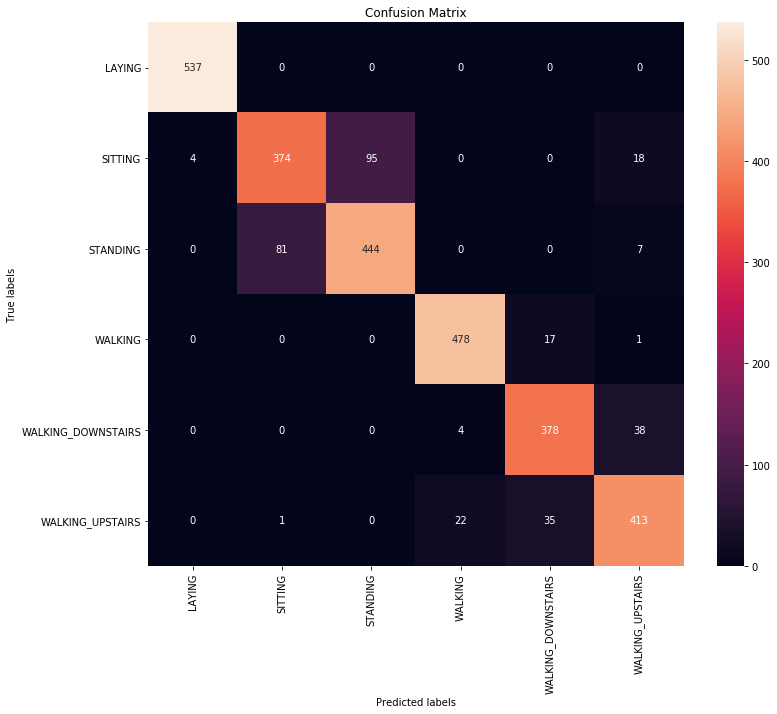

In [84]:
scores2 = model2.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores2[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model2.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

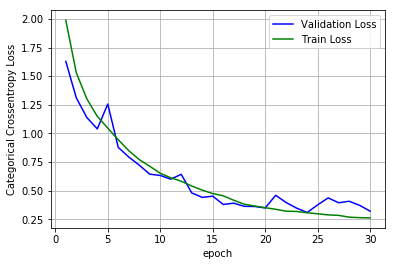

In [37]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model2.history['val_loss']
train_loss = training_model2.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data is good.
# We can see that the best performing epoch is 24.

## Creating 3 Layer Architecture  with 48 neurons in LSTM layers with dropout(0.5).

In [38]:
# Initiliazing the sequential model
model3 = Sequential()
# Configuring the parameters
model3.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a dropout layer
model3.add(Dropout(0.5))
# Adding another LSTM layer
model3.add(LSTM(48))
# Adding a dropout layer
model3.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model3.add(Dense(n_classes, activation='sigmoid'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 48)                18624     
_________________________________________________________________
dropout_8 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 294       
Total params: 30,054
Trainable params: 30,054
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compiling the model
model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model3 = model3.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 39s 5ms/step - loss: 1.3103 - acc: 0.4505 - val_loss: 1.1805 - val_acc: 0.5100
Epoch 2/30
7352/7352 [==============================] - 36s 5ms/step - loss: 1.0348 - acc: 0.5518 - val_loss: 0.9906 - val_acc: 0.5443
Epoch 3/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.8172 - acc: 0.6323 - val_loss: 0.8096 - val_acc: 0.6508
Epoch 4/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.7164 - acc: 0.6715 - val_loss: 0.6613 - val_acc: 0.7231
Epoch 5/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.6011 - acc: 0.7495 - val_loss: 0.7240 - val_acc: 0.7299
Epoch 6/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.5326 - acc: 0.7871 - val_loss: 0.5998 - val_acc: 0.7832
Epoch 7/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.4662 - acc: 0.8152 - val_loss: 0.6589 - val_acc: 0.7564
Epoch 8

Test Accuracy: 91.414998%

--------------------------------------------



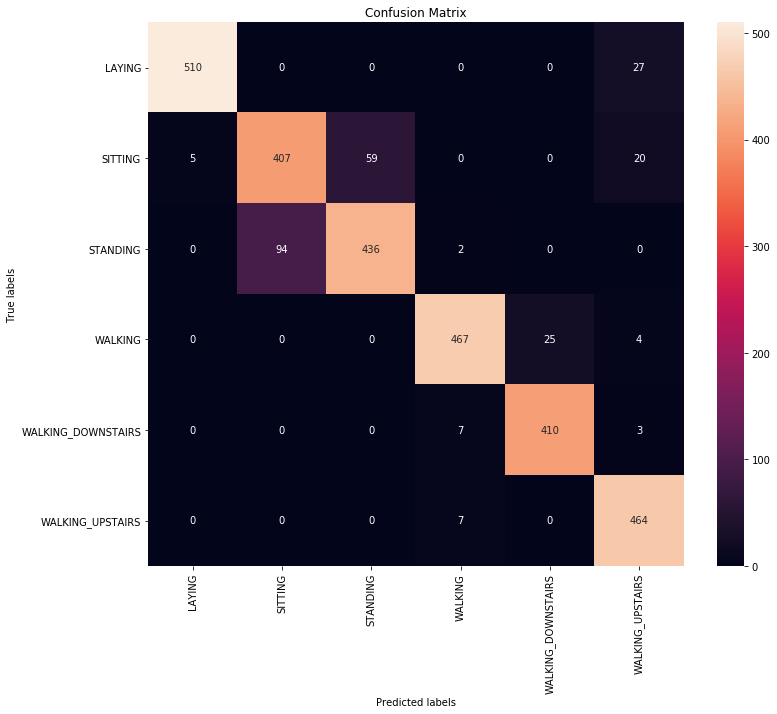

In [88]:
scores3 = model3.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores3[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model3.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

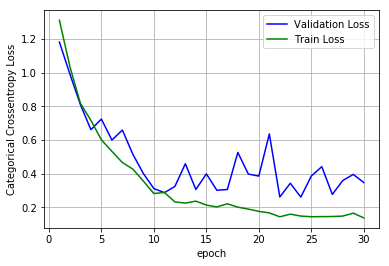

In [41]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model3.history['val_loss']
train_loss = training_model3.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data is also okay.
# The best performing epoch is 24.

## Creating 3 Layer Architecture with 48 neurons in LSTM layers with dropout(0.5) and BatchNormalization().

In [42]:
# Initiliazing the sequential model
model4 = Sequential()
# Configuring the parameters
model4.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a batchnormalization layer
model4.add(BatchNormalization())
# Adding a dropout layer
model4.add(Dropout(0.5))
# Adding another LSTM layer
model4.add(LSTM(48))
# Adding a dropout layer
model4.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model4.add(Dense(n_classes, activation='sigmoid'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 48)                18624     
_________________________________________________________________
dropout_10 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 294       
Total params: 30,246
Trainable params: 30,150
Non-trainable params: 96
_________________________________________________________________


In [43]:
# Compiling the model
model4.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model4 = model4.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 48s 6ms/step - loss: 1.0619 - acc: 0.6421 - val_loss: 0.8131 - val_acc: 0.6732
Epoch 2/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.6507 - acc: 0.7816 - val_loss: 0.5477 - val_acc: 0.8381
Epoch 3/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.4674 - acc: 0.8753 - val_loss: 0.3776 - val_acc: 0.8724
Epoch 4/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.3422 - acc: 0.9094 - val_loss: 0.3571 - val_acc: 0.8809
Epoch 5/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.2606 - acc: 0.9249 - val_loss: 0.2586 - val_acc: 0.9091
Epoch 6/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.2258 - acc: 0.9324 - val_loss: 0.3059 - val_acc: 0.8935
Epoch 7/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.1981 - acc: 0.9392 - val_loss: 0.4084 - val_acc: 0.8354
Epoch 8

Test Accuracy: 92.466916%

--------------------------------------------



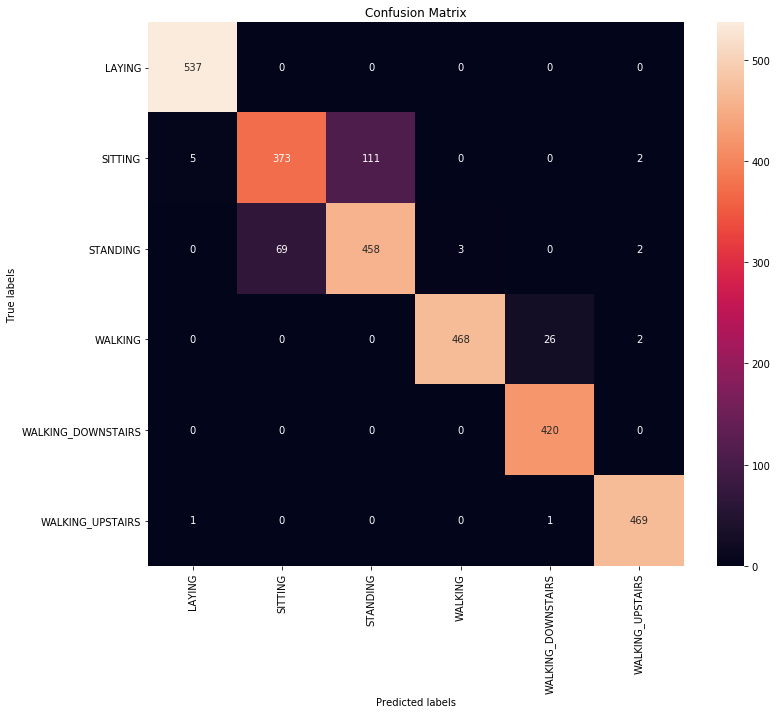

In [92]:
scores4 = model4.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores4[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model4.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

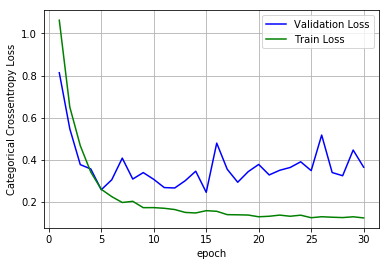

In [46]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model4.history['val_loss']
train_loss = training_model4.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data is getting worse.
# Thebest epoch is 5.

## Creating 3 Layer Architecture with 48 neurons in LSTM layers with dropout(0.7) and BatchNormalization().

In [47]:
# Initiliazing the sequential model
model5 = Sequential()
# Configuring the parameters
model5.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a batchnormalization layer
model5.add(BatchNormalization())
# Adding a dropout layer
model5.add(Dropout(0.7))
# Adding another LSTM layer
model5.add(LSTM(48))
# Adding a dropout layer
model5.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model5.add(Dense(n_classes, activation='sigmoid'))
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 48)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 48)                18624     
_________________________________________________________________
dropout_12 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 294       
Total params: 30,246
Trainable params: 30,150
Non-trainable params: 96
_________________________________________________________________


In [48]:
# Compiling the model
model5.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model5 = model5.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 40s 5ms/step - loss: 1.2328 - acc: 0.5673 - val_loss: 1.0364 - val_acc: 0.5772
Epoch 2/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.8647 - acc: 0.6624 - val_loss: 0.8376 - val_acc: 0.6393
Epoch 3/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.7623 - acc: 0.7031 - val_loss: 0.7561 - val_acc: 0.6759
Epoch 4/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.6657 - acc: 0.7603 - val_loss: 0.6550 - val_acc: 0.6773
Epoch 5/30
7352/7352 [==============================] - 38s 5ms/step - loss: 0.5871 - acc: 0.8026 - val_loss: 0.7362 - val_acc: 0.7424
Epoch 6/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.5032 - acc: 0.8470 - val_loss: 0.9763 - val_acc: 0.6729
Epoch 7/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.4322 - acc: 0.8804 - val_loss: 0.6548 - val_acc: 0.8195
Epoch 8

Test Accuracy: 91.041737%

--------------------------------------------



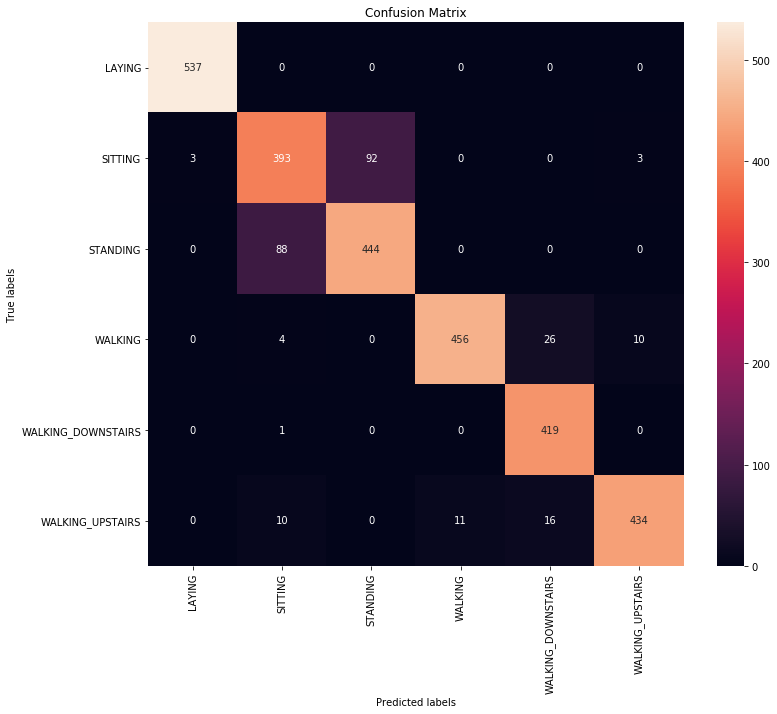

In [110]:
scores5 = model5.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores5[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model5.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

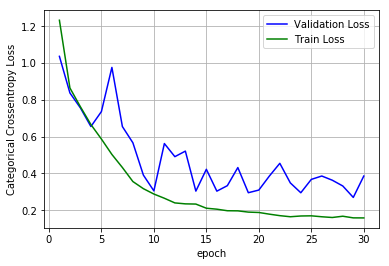

In [50]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model5.history['val_loss']
train_loss = training_model5.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data is close to train data.
# Here the epoch with best test performance is 29.

## Creating 3 Layer Architecture  with 64 neurons in LSTM layers with dropout(0.5).

In [51]:
# Initiliazing the sequential model
model6 = Sequential()
# Configuring the parameters
model6.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a dropout layer
model6.add(Dropout(0.5))
# Adding another LSTM layer
model6.add(LSTM(64))
# Adding a dropout layer
model6.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model6.add(Dense(n_classes, activation='sigmoid'))
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 390       
Total params: 52,358
Trainable params: 52,358
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compiling the model
model6.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [53]:
# Training the model
import datetime
start = datetime.datetime.now()

training_model6 = model6.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 52s 7ms/step - loss: 1.2498 - acc: 0.4770 - val_loss: 1.1952 - val_acc: 0.4781
Epoch 2/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.9652 - acc: 0.5820 - val_loss: 0.9475 - val_acc: 0.5745
Epoch 3/30
7352/7352 [==============================] - 50s 7ms/step - loss: 0.7803 - acc: 0.6468 - val_loss: 0.9951 - val_acc: 0.6037
Epoch 4/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.7146 - acc: 0.6578 - val_loss: 0.7775 - val_acc: 0.6756
Epoch 5/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.6523 - acc: 0.7089 - val_loss: 0.7452 - val_acc: 0.6990
Epoch 6/30
7352/7352 [==============================] - 49s 7ms/step - loss: 0.5826 - acc: 0.7544 - val_loss: 0.6494 - val_acc: 0.7214
Epoch 7/30
7352/7352 [==============================] - 50s 7ms/step - loss: 0.5134 - acc: 0.7811 - val_loss: 0.5835 - val_acc: 0.7944
Epoch 8

Test Accuracy: 90.261283%

--------------------------------------------



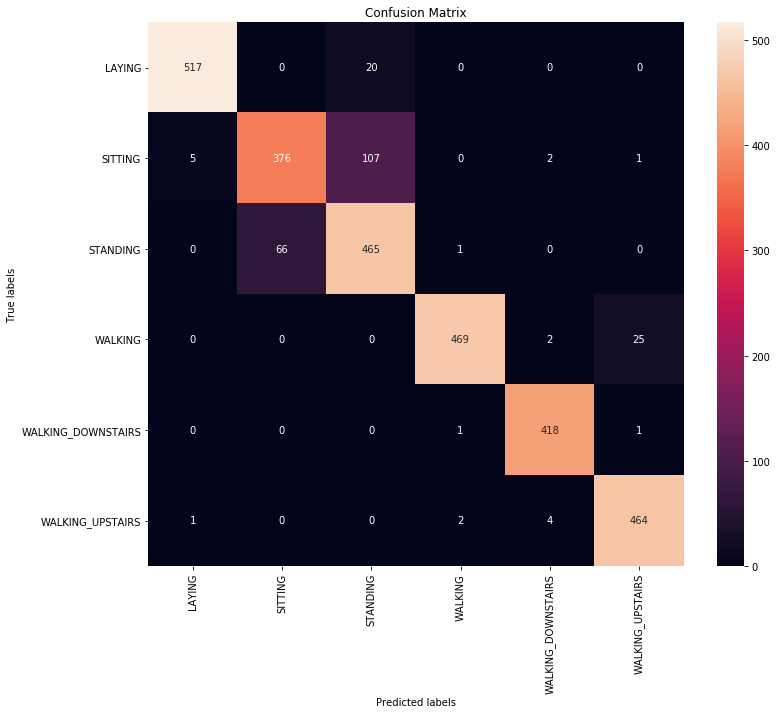

In [102]:
scores6 = model6.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model6.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

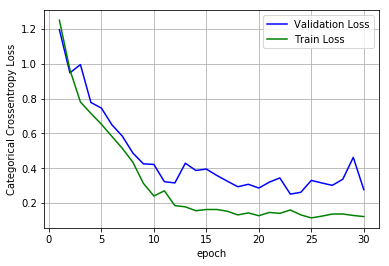

In [54]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model6.history['val_loss']
train_loss = training_model6.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data is close to train data.
# In this case the best epoch is 23.

## Creating 3 Layer Architecture with 64 neurons in LSTM layers with dropout(0.5) and BatchNormalization().

In [55]:
# Initiliazing the sequential model
model7 = Sequential()
# Configuring the parameters
model7.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a batchnormalization layer
model7.add(BatchNormalization())
# Adding a dropout layer
model7.add(Dropout(0.5))
# Adding another LSTM layer
model7.add(LSTM(64))
# Adding a dropout layer
model7.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model7.add(Dense(n_classes, activation='sigmoid'))
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
Total params: 52,614
Trainable params: 52,486
Non-trainable params: 128
_________________________________________________________________


In [56]:
# Compiling the model
model7.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [57]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model7= model7.fit(X_train,
                            Y_train,
                            batch_size=batch_size,
                            validation_data=(X_test, Y_test),
                            epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.9740 - acc: 0.6402 - val_loss: 0.8612 - val_acc: 0.6379
Epoch 2/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.6083 - acc: 0.7692 - val_loss: 0.5041 - val_acc: 0.8524
Epoch 3/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.4083 - acc: 0.8753 - val_loss: 0.4324 - val_acc: 0.8537
Epoch 4/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.2834 - acc: 0.9119 - val_loss: 0.4271 - val_acc: 0.8558
Epoch 5/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.2147 - acc: 0.9272 - val_loss: 0.4046 - val_acc: 0.8616
Epoch 6/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.1985 - acc: 0.9308 - val_loss: 0.3006 - val_acc: 0.9057
Epoch 7/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.1791 - acc: 0.9376 - val_loss: 0.2704 - val_acc: 0.9101
Epoch 8

Test Accuracy: 90.261283%

--------------------------------------------



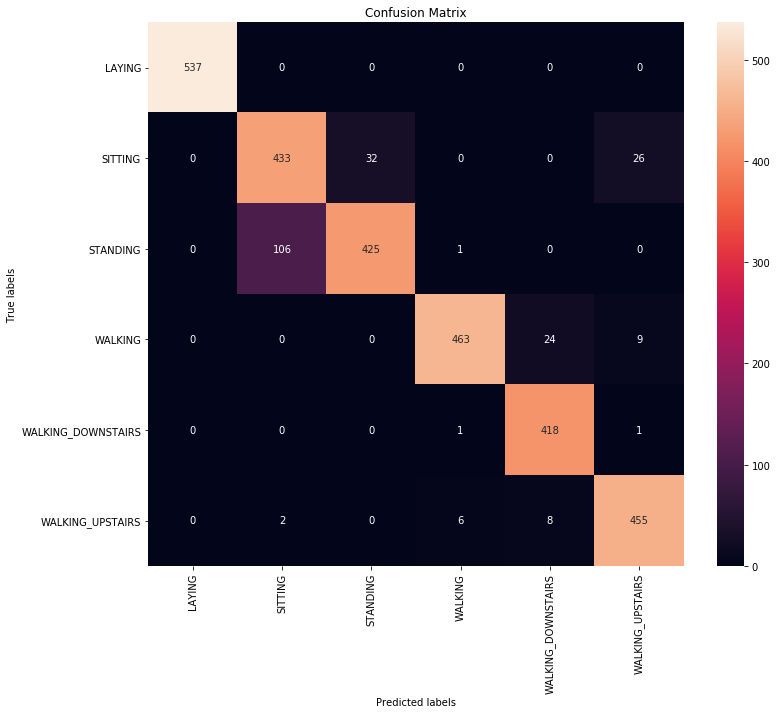

In [106]:
scores7 = model7.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model7.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

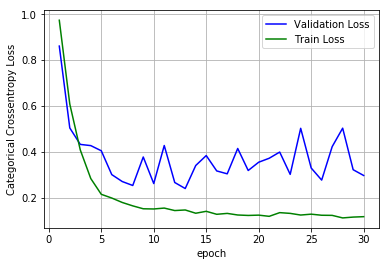

In [58]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model7.history['val_loss']
train_loss = training_model7.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data is getting worse as the epochs increase.
# The best performing epoch is 13.

## Creating 3 Layer Architecture with 64 neurons in LSTM layers with dropout(0.7) and BatchNormalization().

In [59]:
# Initiliazing the sequential model
model8 = Sequential()
# Configuring the parameters
model8.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences= True))
# Adding a batchnormalization layer
model8.add(BatchNormalization())
# Adding a dropout layer
model8.add(Dropout(0.7))
# Adding another LSTM layer
model8.add(LSTM(64))
# Adding a dropout layer
model8.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model8.add(Dense(n_classes, activation='sigmoid'))
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_17 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 390       
Total params: 52,614
Trainable params: 52,486
Non-trainable params: 128
_________________________________________________________________


In [60]:
# Compiling the model
model8.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [61]:
# Training the model
#import datetime
start = datetime.datetime.now()

training_model8 = model8.fit(X_train,
                             Y_train,
                             batch_size=batch_size,
                             validation_data=(X_test, Y_test),
                             epochs=epochs)

print('Total time: ',datetime.datetime.now()-start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 54s 7ms/step - loss: 1.1526 - acc: 0.5797 - val_loss: 0.7726 - val_acc: 0.7041
Epoch 2/30
7352/7352 [==============================] - 50s 7ms/step - loss: 0.7381 - acc: 0.7176 - val_loss: 0.7519 - val_acc: 0.7160
Epoch 3/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.5960 - acc: 0.7984 - val_loss: 0.4850 - val_acc: 0.8537
Epoch 4/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.4578 - acc: 0.8554 - val_loss: 0.4803 - val_acc: 0.8032
Epoch 5/30
7352/7352 [==============================] - 50s 7ms/step - loss: 0.3676 - acc: 0.8905 - val_loss: 0.7445 - val_acc: 0.7615
Epoch 6/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.3128 - acc: 0.9091 - val_loss: 0.4232 - val_acc: 0.8459
Epoch 7/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.2728 - acc: 0.9155 - val_loss: 0.5469 - val_acc: 0.7832
Epoch 8

Test Accuracy: 90.261283%

--------------------------------------------



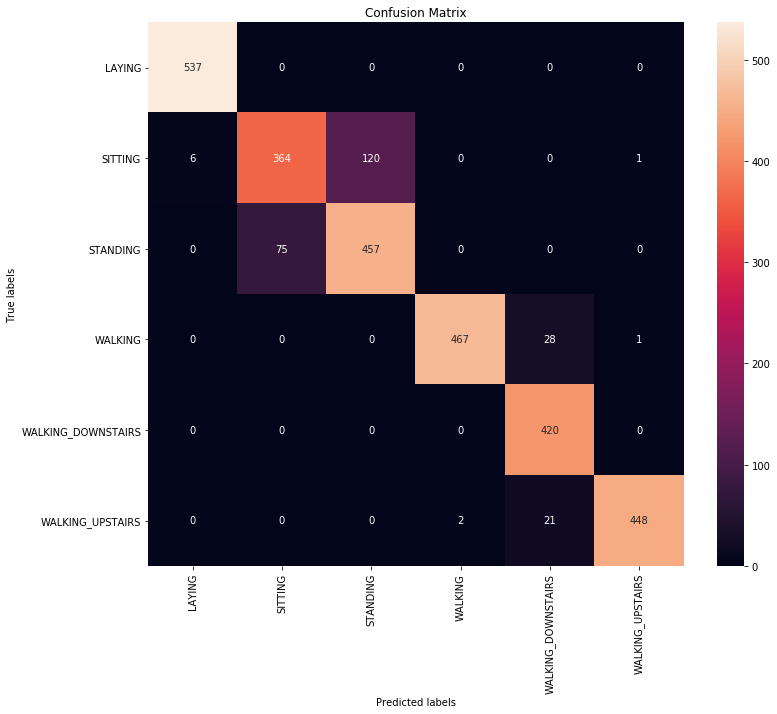

In [114]:
scores8 = model8.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
print("--------------------------------------------")
print()

cm = confusion_matrix(Y_test,model8.predict(X_test))
# Printing the confusion matrix using heatmaps
plt.figure(figsize = (12,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']); 
ax.yaxis.set_ticklabels([ 'LAYING','SITTING', 'STANDING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']);

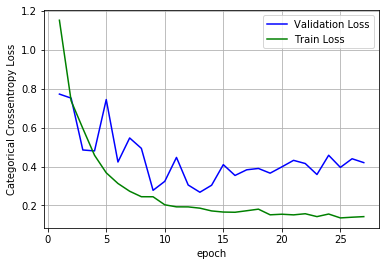

In [62]:
#Plotting the categorical crossentropy loss for the epochs againts the train and validation data.

fig, ax = plt.subplots(1,1)    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
epoch_values = list(range(1,epochs+1))

validation_loss = training_model8.history['val_loss']
train_loss = training_model8.history['loss']   
    
ax.plot(epoch_values, validation_loss, 'b', label="Validation Loss")
ax.plot(epoch_values, train_loss, 'g', label="Train Loss")
plt.legend()
plt.grid()
plt.show()

# We can see that the model learns the training data very well but, the performance on the validation data gets worse as epochs increase
# The best performing model is at epoch 13.

# Conclusion / Model Performance:

In [115]:
import prettytable
from prettytable import PrettyTable

list1 = ['3','3','3','3','3','3','3','3','3']
list2 = ['32','32','32','48','48','48','64','64','64']
list3 = ['No','Yes','Yes','No','Yes','Yes','No','Yes','Yes']
list4 = ['0.5','0.5','0.7','0.5','0.5','0.7','0.5','0.5','0.7']
list5 = ['90.261%','92.670%','89.039%','91.414%','92.466%','91.041%','90.261%','90.261%','90.261%']


print('The scores for the different models are:')
table = PrettyTable(['Architecture Layers','Nuerons in /n LSTM Layer','Batch Normalization', 'Dropout', 'Test Accuracy'])
for x in range(0,9):
    table.add_row([list1[x],list2[x],list3[x],list4[x], list5[x]])
                                       
print(table)  

The scores for the different models are:
+---------------------+--------------------------+---------------------+---------+---------------+
| Architecture Layers | Nuerons in /n LSTM Layer | Batch Normalization | Dropout | Test Accuracy |
+---------------------+--------------------------+---------------------+---------+---------------+
|          3          |            32            |          No         |   0.5   |    90.261%    |
|          3          |            32            |         Yes         |   0.5   |    92.670%    |
|          3          |            32            |         Yes         |   0.7   |    89.039%    |
|          3          |            48            |          No         |   0.5   |    91.414%    |
|          3          |            48            |         Yes         |   0.5   |    92.466%    |
|          3          |            48            |         Yes         |   0.7   |    91.041%    |
|          3          |            64            |          No      

# Project Summary: